In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fiverr/hamza00018/Housing.csv')

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [47]:
# prompt: pd.getdummies

import pandas as pd
data = pd.get_dummies(data)


In [48]:
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,...,1,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,...,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [88]:
# Extract features and target variable
X = data.drop(columns='price')
Y = data['price']

# Feature scaling (optional but recommended)
# X = (X - X.mean()) / X.std()

# Add bias term
X.insert(0, 'bias', 1)

# Convert to numpy arrays
X = X.values
Y = Y.values

# Initialize parameters
coefficients = np.zeros(X.shape[1])

# Adam parameters
alpha = 0.8  # Learning rate
beta1 = 0.9  # Exponential decay rate for the first moment estimates
beta2 = 0.999  # Exponential decay rate for the second moment estimates
epsilon = 1e-8

# Initialize first and second moments
m = np.zeros(X.shape[1])
v = np.zeros(X.shape[1])

# Number of iterations for Adam
iterations = 1000000

# Number of data points
n = len(X)

# Prepare plot
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Full batch

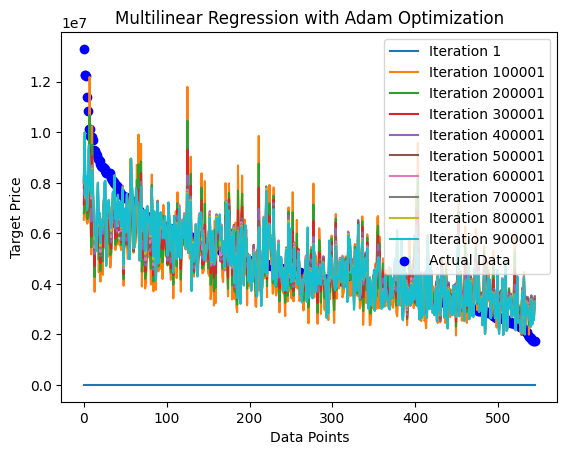

In [89]:
# Adam Optimization
for i in range(iterations):
    # Predict current Y
    Y_pred = X.dot(coefficients)

    # Compute gradients
    error = Y_pred - Y
    grad_coefficients = (1 / n) * X.T.dot(error)

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * grad_coefficients

    # Update biased second raw moment estimate
    v = beta2 * v + (1 - beta2) * (grad_coefficients ** 2)

    # Compute bias-corrected first moment estimate
    m_hat = m / (1 - beta1 ** (i + 1))

    # Compute bias-corrected second raw moment estimate
    v_hat = v / (1 - beta2 ** (i + 1))

    # Update parameters
    coefficients -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    # Plotting the line at specific iterations
    if i % (iterations // 10) == 0:
        plt.plot(range(len(Y_pred)), Y_pred, label=f'Iteration {i+1}')

plt.scatter(range(len(Y)), Y, color='blue', label='Actual Data')

plt.title('Multilinear Regression with Adam Optimization')
plt.xlabel('Data Points')
plt.ylabel('Target Price')
plt.legend()
plt.show()


In [90]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
Y_pred = X.dot(coefficients)

# Calculate RMSE
rmse_adam = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculate R2
r2_adam = r2_score(Y, Y_pred)

print("Adam Optimization:")
print("RMSE:", rmse_adam)
print("R-squared:", r2_adam)


Adam Optimization:
RMSE: 1057540.4110769562
R-squared: 0.6797389216086349


Mini-batch

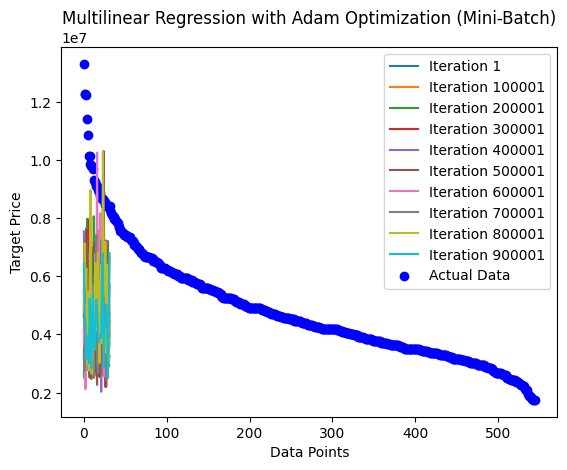

In [91]:
# Mini-batch size
batch_size = 32

# Adam Optimization with mini-batch
for i in range(iterations):
    # Sample a mini-batch
    indices = np.random.choice(n, batch_size, replace=False)
    X_batch = X[indices]
    Y_batch = Y[indices]

    # Predict current Y
    Y_pred = X_batch.dot(coefficients)

    # Compute gradients
    error = Y_pred - Y_batch
    grad_coefficients = (1 / batch_size) * X_batch.T.dot(error)

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * grad_coefficients

    # Update biased second raw moment estimate
    v = beta2 * v + (1 - beta2) * (grad_coefficients ** 2)

    # Compute bias-corrected first moment estimate
    m_hat = m / (1 - beta1 ** (i + 1))

    # Compute bias-corrected second raw moment estimate
    v_hat = v / (1 - beta2 ** (i + 1))

    # Update parameters
    coefficients -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    # Plotting the line at specific iterations
    if i % (iterations // 10) == 0:
        plt.plot(range(len(Y_pred)), Y_pred, label=f'Iteration {i+1}')

plt.scatter(range(len(Y)), Y, color='blue', label='Actual Data')

plt.title('Multilinear Regression with Adam Optimization (Mini-Batch)')
plt.xlabel('Data Points')
plt.ylabel('Target Price')
plt.legend()
plt.show()

In [92]:
# Predictions
Y_pred = X.dot(coefficients)

# Calculate RMSE
rmse_adam = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculate R2
r2_adam = r2_score(Y, Y_pred)

print("Adam Optimization(Mini-Batch):")
print("RMSE:", rmse_adam)
print("R-squared:", r2_adam)

Adam Optimization(Mini-Batch):
RMSE: 1055422.2327074725
R-squared: 0.6810205572192882


Stochastic Gradient Descent

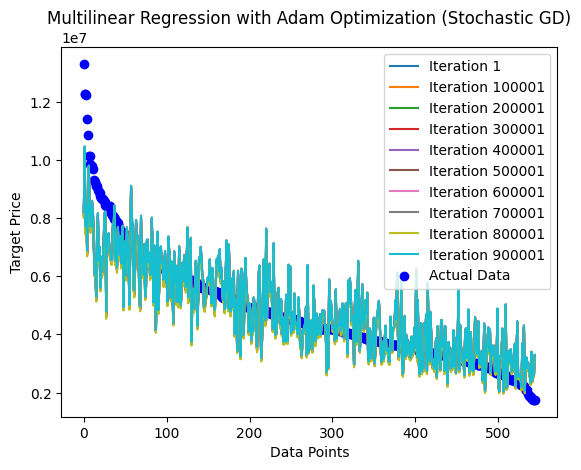

In [93]:
# Adam Optimization with Stochastic Gradient Descent
for i in range(iterations):
    # Select a random data point
    idx = np.random.randint(n)
    x_i = X[idx]
    y_i = Y[idx]

    # Predict current Y
    y_pred = np.dot(x_i, coefficients)

    # Compute gradient
    error = y_pred - y_i
    grad_coefficients = x_i * error

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * grad_coefficients

    # Update biased second raw moment estimate
    v = beta2 * v + (1 - beta2) * (grad_coefficients ** 2)

    # Compute bias-corrected first moment estimate
    m_hat = m / (1 - beta1 ** (i + 1))

    # Compute bias-corrected second raw moment estimate
    v_hat = v / (1 - beta2 ** (i + 1))

    # Update parameters
    coefficients -= alpha * m_hat / (np.sqrt(v_hat) + epsilon)

    # Plotting the line at specific iterations
    if i % (iterations // 10) == 0:
        y_pred_all = np.dot(X, coefficients)
        plt.plot(range(len(Y)), y_pred_all, label=f'Iteration {i+1}')

plt.scatter(range(len(Y)), Y, color='blue', label='Actual Data')

plt.title('Multilinear Regression with Adam Optimization (Stochastic GD)')
plt.xlabel('Data Points')
plt.ylabel('Target Price')
plt.legend()
plt.show()

In [94]:
# Predictions
Y_pred = X.dot(coefficients)

# Calculate RMSE
rmse_adam = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculate R2
r2_adam = r2_score(Y, Y_pred)

print("Adam Optimization:(Stochastic GD)")
print("RMSE:", rmse_adam)
print("R-squared:", r2_adam)

Adam Optimization:(Stochastic GD)
RMSE: 1060687.9286814241
R-squared: 0.6778297227759253
